In [142]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

## Data creation and Visualization

### inverse transform sampling

<span style =" color:green;font-weight:bold">For the derivation of the inverse of CDF, our solution is basically the same as the solution. </span>

In [143]:
%%latex
\begin{align}

p(X=x|Y=0) = 2 - 2x , x \in [0,1] \\
F_{X}(x) = \int_{-\infty}^{x} (2-2t) dt  \\
F_{X}(x) = \int_{0}^{x} (2-2t) dt   \\
F_{X}(x) = 2x - x^{2}

\end{align}

<IPython.core.display.Latex object>

Next, we want to find the inverse of the CDF of $p(X=x|Y=0)$

In [144]:
%%latex
\begin{align}

y = -x^{2} + 2x \\
y = -(x-1)^{2} +1 \\
(x-1)^{2} = 1-y \\
x = \pm \sqrt{1-y} +1 \\

\end{align}

<IPython.core.display.Latex object>

We take the negative sign for the inverse of $2x-x^{2}$ in the domain $[0,1]$. Therefore, the inverse of CDF is $-\sqrt{1-x} +1$

Next, we use inverse transform sampling to sample data from the distribution

In [145]:
def inv_CDF_first_class(x):
    """
    argument -- x: an array which follows uniform distribution Unif[0,1]
    output -- an array which follows the distrubtion 2-2x
    """
    return -np.sqrt(1-x) +1

We do the same for $p(X=x|Y=1)$:

In [146]:
%%latex
\begin{align}

p(X=x|Y=1) = 2x , x \in [0,1] \\
F_{X}(x) = \int_{-\infty}^{x} 2t dt  \\
F_{X}(x) = \int_{0}^{x} 2t dt   \\
F_{X}(x) = x^{2}

\end{align}

<IPython.core.display.Latex object>

Next, we want to find the inverse of the CDF of $p(X=x|Y=1)$

In [147]:
%%latex
\begin{align}

y = x^{2} \\
x = \pm \sqrt{y} \\

\end{align}

<IPython.core.display.Latex object>

We take the positive sign in the domain $[0,1]$. Therefore, the inverse of CDF is $\sqrt{x}$

In [148]:
def inv_CDF_second_class(x):
    """
    argument -- x: an array which follows uniform distribution Unif[0,1]
    output -- an array which follows the distrubtion 2x
    """
    return np.sqrt(x)

<span style =" color:green ;font-weight:bold"> In our implementation, the number of labels for Y=0 and the number of labels for Y=1 are generated to be the same. In the solution, the random variable Y are drawn randomly from the distribution where the probability of them occuring is the same, and they may not have the exact same occurrence. The solution is better because Y are drawn randomly from the distribution instead of being deterministic like in our implementation. </span>

In [149]:
def create_data(N):
    """
    arguments -- N: the number of data points
    ----------------------------------------
    output -- X: an array of values in the range of [0,1] which follows uniform distribution
              Y: an array of labels. Either 0 or 1
    """
    assert N%2==0
    num_x1 = int(N/2)   # p(Y=0)=1/2
    num_x2 = int(N/2)   # p(Y=1) 1/2
    u_1 = np.random.uniform(0,1,num_x1)
    u_2 = np.random.uniform(0,1,num_x2)
    x_1 = inv_CDF_first_class(u_1)  #random variable which follows the distribution of 2-2x
    x_2 = inv_CDF_second_class(u_2) #random variable which follows the distribution of 2x
    zeros = np.zeros(num_x1)  #labels for the first class
    ones = np.ones(num_x2)   #labels for the second class
    x = np.concatenate((x_1, x_2))
    y = np.concatenate((zeros, ones))
    return x, y

In [150]:
X, Y = create_data(10000)

<ul>

   <li style =" color:green ;font-weight:bold"> In the solution, the plot of the occurrence of different Y's is shown while in our implementation we didn't do this. </li>
   <li style =" color:green ;font-weight:bold"> The solution includes titles in the plots, which is something we should have done. </li>
   <li style =" color:green ;font-weight:bold"> The plots of distribution of $P(X|Y=0)$ and $P(X|Y=1)$ in our implementation basically look the same as in the solution </li>
   <li style =" color:green ;font-weight:bold"> The solution includes the graph of CDF for Y=0 and Y=1 for better visualization. </li>

</ul>

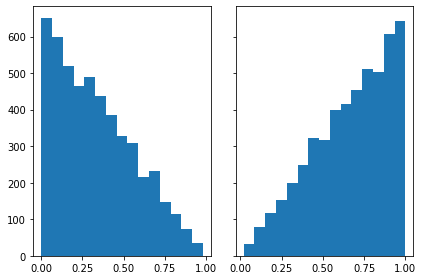

In [151]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(X[:5000], bins=15)
axs[1].hist(X[5000:], bins=15)
plt.show();

## Classification and threshold

<ul>

   <li style =" color:green ;font-weight:bold"> The solution includes some nice plots for different cases while in our code we didn't do the plotting. </li>
   <li style =" color:green ;font-weight:bold"> We showed that the error rate is at its minimum when the decision boundary is $x=0.5$. This is the same as in the solution. </li>
   <li style =" color:green ;font-weight:bold"> The solution shows graphically that standard deviation decreases as M increases. We also showed the same, but instead of doing it graphically, we printed the value of std for each case separately. We should have probably also included the plots for better visualization. </li>
   <li style =" color:green ;font-weight:bold"> The solution uses pandas dataframe to present the findings for different cases. This is something we should consider using in the next sheet </li>

</ul>

In [152]:
def classifier_A(x, xt):
    """
    auguments -- x : an array of data points in the range of [0,1]
                 xt : threshold
    --------------------------------------------------------------
    output : prediction of classes
    """
    return x >= xt

def classifier_B(x, xt):
    """
    auguments -- x : an array of data points in the range of [0,1]
                 xt : threshold
    -----------------------------------------------------------------
    output : prediction of classes  
    """
    return x < xt

def error_rate(classifier, xt, x, y):
    """
    arguments --  classifier : the type of classifier 
                          tx : threshold
                           x : an array of points in the range of [0,1]
                           y : true labels of classes in {0,1}
    --------------------------------------------------------------------
    output : error rate 
    """
    assert len(x) == len(y)
    N = len(x)
    return np.sum(classifier(x, xt) != y)/N

def theoretical_error_rate(classifier, xt):
    """
    arguments -- classifier : the type of classifier
                         xt : threshold
    
    -------------------------------------------------
    output: the theoretical error rate of the classifier
    """
    if classifier == classifier_A:
        return 1/4 + (xt - 1/2)**2
    if classifier == classifier_B:
        return 3/4 - (xt - 1/2)**2

In [153]:
def error_rate_experimental_theoretical(M, xt, classifier):
    """
    arguments --  M : test set size
                 xt : threshold
          classifier: the type of classifier. Either classifier A or classifier B
    
    """
    error = []
    
    for _ in range(10):
        X, Y = create_data(M)
        error.append(error_rate(classifier, xt, X, Y))
    
    mean = np.mean(np.array(error))
    std = np.std(np.array(error))
    
    theoretical_error = theoretical_error_rate(classifier, xt)
    print("The experimental error is: " + str(mean) + " while the theoretical error is: " + str(theoretical_error))
    return mean, std, theoretical_error

### M = 10

#### $x_{t} = 0.2$

error rate using classifier A:

In [154]:
error_rate_experimental_theoretical(10, 0.2, classifier_A)

The experimental error is: 0.33999999999999997 while the theoretical error is: 0.33999999999999997


(0.33999999999999997, 0.08, 0.33999999999999997)

error rate using classifier B:

In [155]:
error_rate_experimental_theoretical(10, 0.2, classifier_B)

The experimental error is: 0.6599999999999999 while the theoretical error is: 0.66


(0.6599999999999999, 0.06633249580710801, 0.66)

#### $x_{t}=0.5$

error rate using classifier A:

In [156]:
error_rate_experimental_theoretical(10, 0.5, classifier_A)

The experimental error is: 0.27999999999999997 while the theoretical error is: 0.25


(0.27999999999999997, 0.19390719429665315, 0.25)

error rate using classifier B:

In [157]:
error_rate_experimental_theoretical(10, 0.5, classifier_B)

The experimental error is: 0.73 while the theoretical error is: 0.75


(0.73, 0.11874342087037919, 0.75)

#### $x_{t}=0.6$

error rate using classifier A:

In [158]:
error_rate_experimental_theoretical(10, 0.6, classifier_A)

The experimental error is: 0.23000000000000004 while the theoretical error is: 0.26


(0.23000000000000004, 0.11, 0.26)

error rate using classifier B:

In [159]:
error_rate_experimental_theoretical(10, 0.6, classifier_B)

The experimental error is: 0.72 while the theoretical error is: 0.74


(0.72, 0.13266499161421602, 0.74)

### M = 100

#### $x_{t} = 0.2$

error rate using classifier A:

In [160]:
error_rate_experimental_theoretical(100, 0.2, classifier_A)

The experimental error is: 0.33699999999999997 while the theoretical error is: 0.33999999999999997


(0.33699999999999997, 0.02722131517763239, 0.33999999999999997)

error rate using classifier B:

In [161]:
error_rate_experimental_theoretical(100, 0.2, classifier_B)

The experimental error is: 0.655 while the theoretical error is: 0.66


(0.655, 0.025, 0.66)

#### $x_{t}=0.5$

error rate using classifier A

In [162]:
error_rate_experimental_theoretical(100, 0.5, classifier_A)

The experimental error is: 0.263 while the theoretical error is: 0.25


(0.263, 0.03407345007480164, 0.25)

error rate using classifier B:

In [163]:
error_rate_experimental_theoretical(100, 0.5, classifier_B)

The experimental error is: 0.74 while the theoretical error is: 0.75


(0.74, 0.05099019513592784, 0.75)

#### $x_{t}=0.6$

error rate using classifier A:

In [164]:
error_rate_experimental_theoretical(100, 0.6, classifier_A)

The experimental error is: 0.258 while the theoretical error is: 0.26


(0.258, 0.06779380502671317, 0.26)

error rate using classifier B:

In [165]:
error_rate_experimental_theoretical(100, 0.6, classifier_B)

The experimental error is: 0.7530000000000001 while the theoretical error is: 0.74


(0.7530000000000001, 0.04050925820105818, 0.74)

### M=1000

#### $x_{t}=0.2$

error rate using classifier A:

In [166]:
error_rate_experimental_theoretical(1000, 0.2, classifier_A)

The experimental error is: 0.3407 while the theoretical error is: 0.33999999999999997


(0.3407, 0.012091732712891061, 0.33999999999999997)

error rate using classifier B:

In [167]:
error_rate_experimental_theoretical(1000, 0.2, classifier_B)

The experimental error is: 0.6599999999999999 while the theoretical error is: 0.66


(0.6599999999999999, 0.009633275663033845, 0.66)

#### $x_{t}=0.5$

error rate using classifier A:

In [168]:
error_rate_experimental_theoretical(1000, 0.5, classifier_A)

The experimental error is: 0.2473 while the theoretical error is: 0.25


(0.2473, 0.021218152605728898, 0.25)

error rate using classifier B:

In [169]:
error_rate_experimental_theoretical(1000, 0.5, classifier_B)

The experimental error is: 0.7466999999999999 while the theoretical error is: 0.75


(0.7466999999999999, 0.009664884893261802, 0.75)

#### $x_{t} = 0.6$

error rate using classifier A:

In [170]:
error_rate_experimental_theoretical(1000, 0.6, classifier_A)

The experimental error is: 0.2591 while the theoretical error is: 0.26


(0.2591, 0.015062868252759834, 0.26)

error rate using classifier B:

In [171]:
error_rate_experimental_theoretical(1000, 0.6, classifier_B)

The experimental error is: 0.7408 while the theoretical error is: 0.74


(0.7408, 0.010146920715172666, 0.74)

### M = 10000

#### $x_{t}=0.2$

error rate using classifier A:

In [172]:
error_rate_experimental_theoretical(10000, 0.2, classifier_A)

The experimental error is: 0.34018 while the theoretical error is: 0.33999999999999997


(0.34018, 0.0034207601494404805, 0.33999999999999997)

error rate using classifier B:

In [173]:
error_rate_experimental_theoretical(10000, 0.2, classifier_B)

The experimental error is: 0.6600400000000001 while the theoretical error is: 0.66


(0.6600400000000001, 0.0024487547856002277, 0.66)

#### $x_{t}=0.5$

error rate using classifier A:

In [174]:
error_rate_experimental_theoretical(10000, 0.5, classifier_A)

The experimental error is: 0.24884999999999996 while the theoretical error is: 0.25


(0.24884999999999996, 0.0020977368757782765, 0.25)

error rate using classifier B:

In [175]:
error_rate_experimental_theoretical(10000, 0.5, classifier_B)

The experimental error is: 0.74734 while the theoretical error is: 0.75


(0.74734, 0.0032465982196754808, 0.75)

#### $x_{t}=0.6$

error rate using classifier A:

In [176]:
error_rate_experimental_theoretical(10000, 0.6, classifier_A)

The experimental error is: 0.2597 while the theoretical error is: 0.26


(0.2597, 0.0035156791662493882, 0.26)

error rate using classifier B:

In [177]:
error_rate_experimental_theoretical(10000, 0.6, classifier_B)

The experimental error is: 0.73909 while the theoretical error is: 0.74


(0.73909, 0.004471118428312974, 0.74)

The error standard deviation decreases with increasing $M$.

## 1.3 Baseline Classifiers

<ul>

   <li style =" color:green ;font-weight:bold"> Here we use a second method of generating data that is identical to that of the sample solution </li> 
     <li style =" color:green ;font-weight:bold"> Apart from that, this part is the same, except for visualisation. </li> 
</ul>    

In [178]:
#We define the classifier functions
def classifier_C(x,xt):
    """
    auguments -- x : an array of data points in the range of [0,1]
                
    -----------------------------------------------------------------
    output : prediction of classes  
    """
    return np.random.rand(len(x)) > 0.5 #returns a random decision

def classifier_D(x,xt):
    """
    auguments -- x : an array of data points in the range of [0,1]
                
    -----------------------------------------------------------------
    output : prediction of classes  
    """
    return np.ones(np.size(x)) #returns always Y=1


In [179]:
#Additionally, we have to create data in a way so the number of Y=1 and Y=0 is not the same
def create_data_rand(N):
    """
    arguments -- N: the number of data points
    ----------------------------------------
    output -- X: an array of values in the range of [0,1] which follows uniform distribution
              Y: an array of labels. Either 0 or 1
    """
    
    
    y = np.random.uniform(0,1,N) > 0.5 #creates N Y's with the prior probabilities
    u_1 = np.random.uniform(0,1,N)
    x_1 = inv_CDF_first_class(u_1)  #random variable which follows the distribution of 2-2x, Y=0
    x_2 = inv_CDF_second_class(u_1) #random variable which follows the distribution of 2x, Y=1
    
    x = y*x_2+(1-y)*x_1 #creates the X's according to the likelihoods for different Y's
    return x, y

In [180]:
stdD = []
stdC = []
meanC = []
meanD = []

for M in [10,100,1000,10000]: #try different test set sizes
    errorC = []
    errorD = []

    for _ in range(10):
        X, Y = create_data_rand(M)
        errorC.append(error_rate(classifier_C, 0.2, X, Y)) #compute error rate for classifier C for the test data
        errorD.append(error_rate(classifier_D, 0.2, X, Y)) #compute error rate for classifier D for the test data

    meanC.append(np.mean(errorC))
    stdC.append(np.std(errorC))
    meanD.append(np.mean(errorD))
    stdD.append(np.std(errorD))



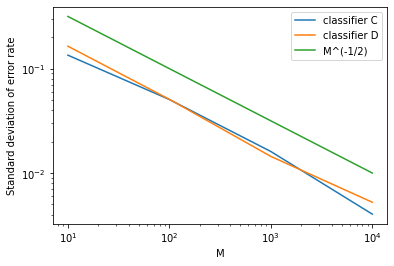

In [181]:
#Standard deviation plot
plt.plot([10,100,1000,10000],stdC, label = 'classifier C')
plt.plot([10,100,1000,10000],stdD, label = 'classifier D')
plt.plot([10,100,1000,10000],1/np.sqrt([10,100,1000,10000]), label = 'M^(-1/2)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('Standard deviation of error rate')
plt.legend()

We can see that the slope of the errors in the log-log graph is the same as of the function $M^{-1/2}$

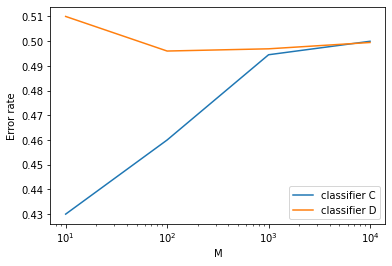

In [182]:
#Error rate plot
plt.plot([10,100,1000,10000],meanC, label = 'classifier C')
plt.plot([10,100,1000,10000],meanD, label = 'classifier D')
plt.xscale('log')
plt.xlabel('M')
plt.ylabel('Error rate')
plt.legend()

## 1.4 Nearest Neighbour problem


In [183]:
#Exercise 4
def classifier_NN(x0, x1, x):
    """
    auguments -- x : an array of data points in the range of [0,1]
                 x0 : reference value of x for label Y = 0
                 x1 : reference value of x for label Y = 1
    --------------------------------------------------------------
    output : prediction of classes
    """
    d0 = np.abs(x-x0)
    d1 = np.abs(x-x1)
    return d0 >= d1

def error_rate_NN(x0, x1, x, y):
    """
    arguments --  classifier : the type of classifier 
                          x0 : reference value of x for label Y = 0
                          x1 : reference value of x for label Y = 1
                           x : an array of points in the range of [0,1]
                           y : true labels of classes in {0,1}
    --------------------------------------------------------------------
    output : error rate 
    """
    assert len(x) == len(y)
    N = len(x)
    return np.sum(classifier_NN(x0, x1, x) != y)/N


def classifier_NN_biggerN(X, Y, x):
    """
    auguments -- X : features training set
                 Y : responses trainig set
                 x : an array of testing data points in the range of [0,1]
    --------------------------------------------------------------
    output : prediction of classes for N > 2
    """
    assert len(X) == len(Y)
    Yassigned = []
    for point in x:
        distance = np.abs(point-X)  #np.array
        distances = distance.tolist() #List (to use atribute .index)
        index = (distances.index(min(distances)))
        Yassigned.append(Y[index])
    return Yassigned

def error_rate_NN_biggerN(Xtraining, Ytraining, Xtest, Ytest):
    """
    arguments --  classifier : the type of classifier 
                          x0 : reference value of x for label Y = 0
                          x1 : reference value of x for label Y = 1
                           x : an array of points in the range of [0,1]
                           y : true labels of classes in {0,1}
    --------------------------------------------------------------------
    output : error rate for N > 2
    """
    assert len(Xtest) == len(Ytest)
    N = len(Xtest)
    return np.sum(classifier_NN_biggerN(Xtraining, Ytraining, Xtest) != Ytest)/N


<ul>

   <li style =" color:green ;font-weight:bold"> In the solutions sheeet, one single function is implemented for all training data sizes. This is a more elegant solution than ours, who did it in two steps. 
The functions: classifier_NN and error_rate_NN are not necessary, we could have worked with the general ones also for N = 2.</li>
   <li style =" color:green ;font-weight:bold"> In the implementation of the classifier, a vectorized algorithm replacing the loop would have been more optimal for saving computing time. </li>

</ul>


In [184]:
#Test on one training set N = 2
Xtraining, Ytraining = create_data(2)
Xtest, Ytest = create_data(10000)

print('Error rate = ', error_rate_NN(Xtraining[0], Xtraining[1], Xtest, Ytest) )



Error rate =  0.2561


When testing on one N = 2 training set, the resulting error rate is very depending on the two data points of the training set, so the values of the error rate have a significant variation.

In [185]:
#Average errors on 100 training sets (N=2)
error = []
for i in range (0, 100):
    Xtraining, Ytraining = create_data(2)
    error.append(error_rate_NN(Xtraining[0], Xtraining[1], Xtest, Ytest))
print('Average errors on 100 training sets (N=2) = ', np.mean(error))

Average errors on 100 training sets (N=2) =  0.35680500000000004


In [186]:
#Get standard deviation from 100 runs
error_av = []
for j in range (0, 100):
  error = []
  for i in range (0, 100):
      Xtraining, Ytraining = create_data(2)
      error.append(error_rate_NN(Xtraining[0], Xtraining[1], Xtest, Ytest))
  error_av.append(np.mean(error))


print('Average errors on 100 training sets (N=2) averaged 100 times = ', np.mean(error_av), np.std(error_av))

Average errors on 100 training sets (N=2) averaged 100 times =  0.3474929999999999 0.014950376636727242


But when averaging the error for 100 training data sets with N=2, the result is always close to 0.35.

From repeating this experience 100 times, we calculate the standard deviation from the value 0.35. We would say that the average error is:
$0.352 \pm 0.017$




<ul>

   <li style =" color:green ;font-weight:bold"> In the solutions sheet, the standard deviation for the error when N=2 was given to be the standard deviation of the errors vector. However, I wanted to check how much the average error differed from the value of 35%. Therefore, I runed the experiment 100 times more, and found the standard deviation *of the average*. This is not necessarily wrong, but we need to remark that both results have different meanings. </li>
   <li style =" color:green ;font-weight:bold"> With respect to the error rate, the values we get are compatible with the solutions provided.
The way of calculating the error is essencially the same as the one in the solution.
We did not need to create the "generate_balanced_training_data" function, since our first "create_data" function already generated equal number of data for both labels. This was perhaps not intended to be the case at the beginning (and a new function was created in section 3, "create_data_rand") </li>

</ul>

In [187]:
#Test on one training set N = 100
Xtraining, Ytraining = create_data(100)
Xtest, Ytest = create_data(10000)

print('Error rate = ', error_rate_NN_biggerN(Xtraining, Ytraining, Xtest, Ytest))

Error rate =  0.3833


In [188]:
#Average errors on 100 training sets (N=100)
error = []
for i in range (0, 100):
    Xtraining, Ytraining = create_data(100)
    av = averaging(Xtraining, Ytraining)
    error.append(error_rate_NN_biggerN(Xtraining, Ytraining, Xtest, Ytest))
print('Average errors on 100 training sets (N=100) = ', np.mean(error))

NameError: name 'averaging' is not defined

<span style ="color:green;font-weight:bold"> BUG: the "av = averaging(Xtraining, Ytraining)" line should be removed! It was part of an all function, and the cell does not run with it. </span>

In [ ]:
#Get standard deviation from 100 runs
error_av = []
for j in range(0,100):    
    error = []
    for i in range (0, 100):
        Xtraining, Ytraining = create_data(100)
        av = averaging(Xtraining, Ytraining)
        error.append(error_rate_NN_biggerN(Xtraining, Ytraining, Xtest, Ytest))
    error_av.append(np.mean(error))
print('Average errors on 100 training sets (N=100) averaged 100 times = ', np.mean(error_av), np.std(error_av))

Lastly, we repeated the experiment for N = 100. When testing on one N = 100 training set, the values of the error rate still have a significant variation, since its very depending on the training data point that is closer to the testing data point, and not all training points are equally well indicative (eg, a point with label $Y_i = 0$ surrounded by points with labels $Y_i = 1$ might be an exception and taking its label could give the wrong predictions).

The average error on 100 training data sets with N = 100 is lower to the one with N = 2, but still around the value of 33%. 

By repeating the experiment 100 times, we derived that the error rate and its standard deviation for N = 100 are:

$0.3322 \pm 0.0025$



<span style="color:green;font-weight:bold"> Same as above: the error given here is the standard deviation of the average error, i.e., the experiment was runned a 100 times, we found the average error for each time and we calculate the standard deviation of the average. If we calculate the standard deviation of the error vector (as done in the solution sheet), we get similar results as the provided in the solutions. </span>